# Simuler une loi de distribution a posteriori avec un algorithme MCMC

In [1]:
import scipy.stats 
import numpy as np
import matplotlib.pyplot as plt
from utils import * 

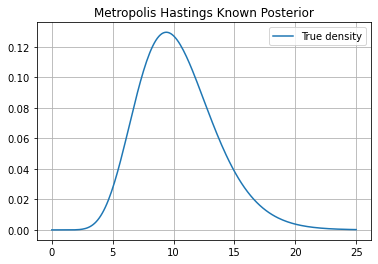

In [2]:
#----------------------------------------------------------------------------------------#
# plot posterior
alpha = 0.5
beta = 0.01
fixed_x = 10
pG = ParametrizedMCMC(fixed_x, alpha, beta)
# Generate the real posterior pdf function
real_posterior = pG.getRealPosterior()


x_array = np.linspace(0, 25, 200)
y_array = np.asarray( [real_posterior(x) for x in x_array] )
#print(y_array)

plt.plot(x_array, y_array, label="True density")

plt.grid()
plt.legend()
plt.title('Metropolis Hastings Known Posterior')
#plt.savefig('posterior.png',bbox_inches='tight')
plt.show()
plt.close()

## Computing the samples via MCMC

In [3]:
N = 100000
s = 10

np.seterr(all="raise")
samples = MCMC_sampling(pG, N, s)

Samples shape : (5000,). Generated from 100000 steps,         taking 1 sample out of 10, and only the last half of the selected samples


## Comparison of samples distribution with true distribution

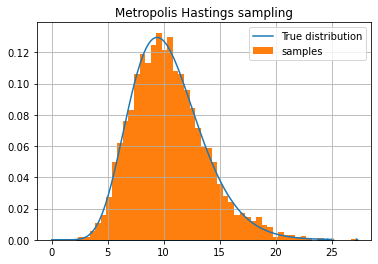

In [4]:
plt.scatter(samples, np.zeros_like(samples), s=10)

plt.plot(x_array,y_array, label="True distribution")
plt.hist(samples, bins=50, density=True, label="samples")

plt.title('Metropolis Hastings sampling')
plt.grid()
plt.legend()
#plt.savefig('metropolis_hastings_1d.png',bbox_inches='tight')
plt.show()
plt.close()

# Kernel density estimation of the obtained samples

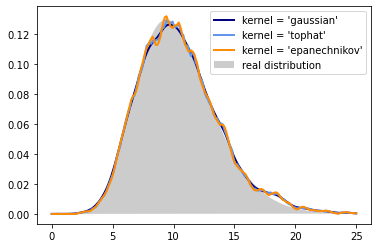

In [5]:
KDE_plot(samples, x_array, y_array)

## Gamma law fit of the law of obtained samples (MLE and Moments Method via Scipy)

In [6]:
fit_alpha_MLE, _, fit_beta_MLE = scipy.stats.gamma.fit(samples, floc=0, method="MLE")
print(f"Maximum Likelihood Estimation : Fitted Alpha = {round(fit_alpha_MLE, 4)}, Fitted Beta = {round(fit_beta_MLE, 4)}")
fit_alpha_MM, _, fit_beta_MM = scipy.stats.gamma.fit(samples, floc=0, method="MM")
print(f"Moments Method : Fitted Alpha = {round(fit_alpha_MM, 4)}, Fitted Beta = {round(fit_beta_MM, 4)}")

Maximum Likelihood Estimation : Fitted Alpha = 10.095, Fitted Beta = 1.0395
Moments Method : Fitted Alpha = 9.9716, Fitted Beta = 1.0524


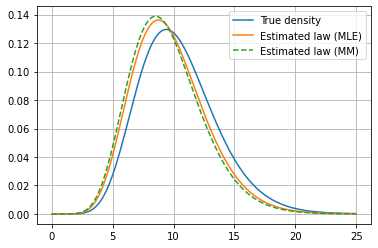

In [7]:
plt.plot(x_array, y_array, label="True density")
plt.plot(x_array, scipy.stats.gamma(fit_alpha_MLE, loc = 0, scale=1/fit_beta_MLE).pdf(x_array), label="Estimated law (MLE)")
plt.plot(x_array, scipy.stats.gamma(fit_alpha_MM, loc = 0, scale=1/fit_beta_MM).pdf(x_array), linestyle="dashed", label="Estimated law (MM)")
plt.grid()
plt.legend()